# Imports

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initial vars

In [83]:
L = 1  # Для x
K = 1  # Для t

M = 10  # Для x
h = L / M

N = 10  # Для t
tau = K / N

a = 0.01

lamb = (a**2 * tau**2) / h**2


X = np.linspace(0, L, M)
T = np.linspace(0, K, N)

In [84]:
a * tau / h, a * tau / h < 1

(0.01, True)

In [85]:
def gamma_0(t):
    return 0


def gamma_1(t):
    return 0


def g(x, t):
    return 2 * x * (x - 1)


def phi(x):
    return x**3 * (1 - x)


def phi_dd(x):
    return 6 * x - 12 * x**2


def psi(x):
    return x - x**2

$$
\dfrac{u_i^{j+1} - 2u_i^j + u_i^{j-1}}{\tau^2} = a^2\dfrac{u_{i+1}^j -2u_i^j + u_{i-1}^j}{h^2} + f_i
$$

$$
\lambda = \dfrac{a^2\tau^2}{h^2} \implies u_j^{j+1} = 2(1-\lambda)u_i^j + \lambda (u_{i+1}^j + u_{i-1}^j) - u_i^{j-1} + \tau^2 f_i
$$

$$
u_i^0 = \phi(x_i)
$$

$$
u_i^1 = u_i^0 + \tau \psi(x_i) + \dfrac{a^2\tau^2}{2} \phi''(x_i) + O(\tau^2)
$$

# Calc

## Initial cond

In [86]:
def u_0(x):
    return psi(x)

In [87]:
U = np.zeros((M, N))
U

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [88]:
U[0] = u_0(X)
U

array([[0.        , 0.09876543, 0.17283951, 0.22222222, 0.24691358,
        0.24691358, 0.22222222, 0.17283951, 0.09876543, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [89]:
U[:, 0] = gamma_0(T)
U[:, -1] = gamma_1(T)

U

array([[0.        , 0.09876543, 0.17283951, 0.22222222, 0.24691358,
        0.24691358, 0.22222222, 0.17283951, 0.09876543, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

$$
u_i^1 = u_i^0 + \tau \psi(x_i) + \dfrac{a^2\tau^2}{2} \phi''(x_i) + O(\tau^2)
$$

In [90]:
U[1, 1:-1] = U[0, 1:-1] + tau * psi(X[1:-1]) + (a**2 * tau**2) / 2 * phi_dd(X[1:-1])
U

array([[0.        , 0.09876543, 0.17283951, 0.22222222, 0.24691358,
        0.24691358, 0.22222222, 0.17283951, 0.09876543, 0.        ],
       [0.        , 0.10864223, 0.19012383, 0.24444478, 0.27160509,
        0.27160475, 0.24444378, 0.19012216, 0.1086399 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

## Main work

$$
\lambda = \dfrac{a^2\tau^2}{h^2} \implies u_j^{j+1} = 2(1-\lambda)u_i^j + \lambda (u_{i+1}^j + u_{i-1}^j) - u_i^{j-1} + \tau^2 f_i
$$

In [91]:
def u_j1(x, t, u_jm, u_im, u_i, u_ip):
    return 2 * (1 - lamb) * u_i + lamb * (u_ip + u_im) - u_jm + tau ** 2 + g(x, t)

In [92]:
for t_index in range(2, N):
    for l_index in range(1, M - 1):
        u_im, u_i, u_ip = U[t_index - 1][l_index - 1 : l_index + 1 + 1]
        U[t_index][l_index] = u_j1(X[l_index], T[t_index - 1], U[t_index - 1][l_index], u_im, u_i, u_ip)

<Axes: >

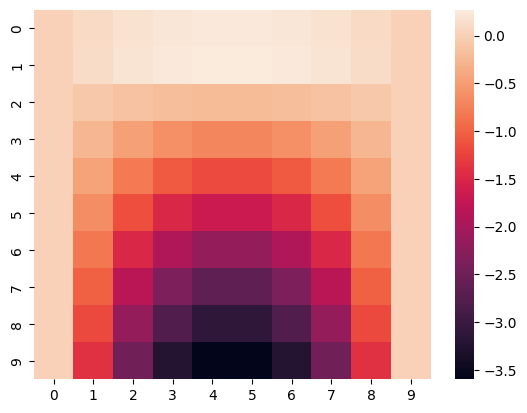

In [93]:
sns.heatmap(U)

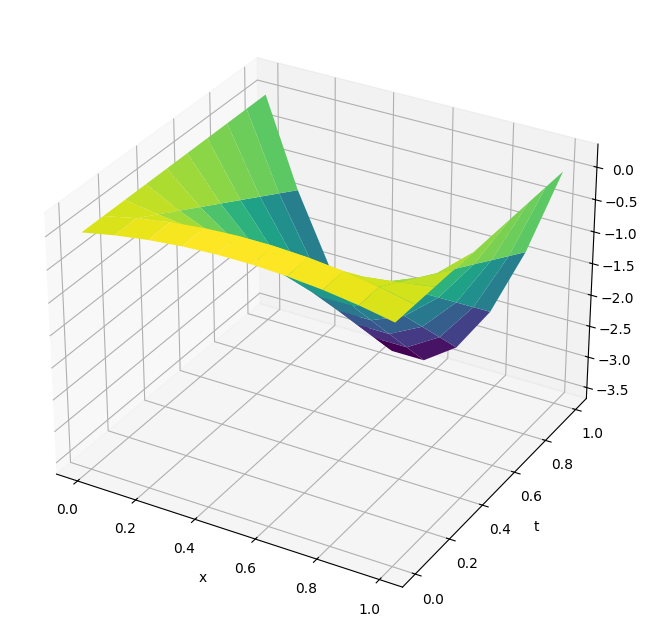

In [94]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X_g, T_g = np.meshgrid(X, T)

ax.plot_surface(X_g, T_g, U, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()
